In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import wilcoxon, ranksums, ks_2samp

In [2]:
# read in the data
trials = pd.read_hdf('C:/Users/Leuthardt_Lab/Documents/GitHub/1-normalized-DS.hdf','trials')

In [4]:
# change session from an index to a column
trials = trials.reset_index(level = 'Session')
trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0
Trial,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06


In [5]:
# add column for time between fp_off and outcome
trials['outcome_latency'] = trials['time_outcome'] - trials['time_fp_off']

In [34]:
# add column for VNS info
trials['VNS'] = np.nan 

vns_sessions = ['2019-01-22 15:10:00','2019-01-22 16:01:00','2019-01-23 15:38:00','2019-01-23 15:39:00','2019-01-29 16:02:00','2019-01-30 16:38:00','2019-02-01 15:03:00']
no_vns = ['2018-12-19 11:02:00','2018-12-19 11:31:00','2018-12-19 15:30:00','2018-12-19 15:57:00','2018-12-19 16:27:00','2018-12-19 17:24:00','2018-12-20 14:56:00','2018-12-20 15:55:00',
          '2018-12-20 16:57:00','2018-12-21 14:56:00','2019-01-14 14:44:00','2019-01-14 16:21:00','2019-01-15 14:28:00','2019-01-15 16:16:00','2019-01-16 14:29:00','2019-01-17 14:54:00',
          '2019-01-17 16:21:00','2019-01-18 14:22:00','2019-01-18 15:58:00','2019-01-22 14:41:00','2019-01-22 16:19:00','2019-01-23 14:31:00','2019-01-24 15:06:00','2019-01-29 14:42:00',
          '2019-01-30 14:59:00','2019-01-31 14:31:00','2019-01-31 16:11:00','2019-02-01 16:08:00']

# update VNS column to be 1 if stim on and 0 if stim off (still NaN if neither, i.e. date not included in book)
for date in vns_sessions:
    trials.loc[trials['Session'] == date, 'VNS'] = 1
    
for date in no_vns:
    trials.loc[trials['Session'] == date, 'VNS'] = 0
    
trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,outcome_latency,VNS
Trial,,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,2.497413,1.0
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,2.494596,1.0
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,2.495273,1.0
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,2.495259,1.0
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,2.495152,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,2.502662,0.0
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,2.487482,0.0
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,2.495600,0.0


In [42]:
good_trials = trials.loc[(trials['good_trials'] == 1) & ((trials['VNS'] == 1.0) | (trials['VNS'] == 0.0))]
good_trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,outcome_latency,VNS
Trial,,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,2.497413,1.0
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,2.494596,1.0
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,2.495273,1.0
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,2.495259,1.0
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,2.495152,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,2.502662,0.0
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,2.487482,0.0
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,2.495600,0.0


In [35]:
goodVNS_trials = trials.loc[(trials['good_trials'] == 1) & (trials['VNS'] == 1.0)]
goodVNS_trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,outcome_latency,VNS
Trial,,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,2.497413,1.0
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,2.494596,1.0
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,2.495273,1.0
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,2.495259,1.0
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,2.495152,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2019-01-30 16:38:00,1,6302,1,10,180,1.867917,4.363036,1.367836,6102,Familiar,6.836556e+06,2.495119,1.0
523,2019-01-30 16:38:00,1,6711,1,10,180,2.062274,4.556632,1.553869,6111,Novel Learning,6.836570e+06,2.494358,1.0
524,2019-01-30 16:38:00,1,6511,1,10,180,2.054452,4.557229,1.554379,6111,Novel Learning,6.836578e+06,2.502777,1.0


In [38]:
goodOFF_trials = trials.loc[(trials['good_trials'] == 1) & (trials['VNS'] == 0.0)]
goodOFF_trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,outcome_latency,VNS
Trial,,,,,,,,,,,,,,
0,2019-02-01 16:08:00,1,6312,1,10,180,2.086088,4.580836,1.585708,6112,Familiar Learning,7.003814e+06,2.494747,0.0
1,2019-02-01 16:08:00,1,6202,1,10,180,1.872023,4.367026,1.371626,6102,Familiar,7.003823e+06,2.495003,0.0
3,2019-02-01 16:08:00,1,6611,1,10,180,2.034426,4.528809,1.525932,6111,Novel Learning,7.003835e+06,2.494383,0.0
4,2019-02-01 16:08:00,1,6711,1,10,180,2.531154,5.025495,2.022575,6111,Novel Learning,7.003843e+06,2.494341,0.0
5,2019-02-01 16:08:00,1,6302,1,10,180,1.873567,4.368013,1.365159,6102,Familiar,7.003853e+06,2.494446,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,2.502662,0.0
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,2.487482,0.0
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,2.495600,0.0


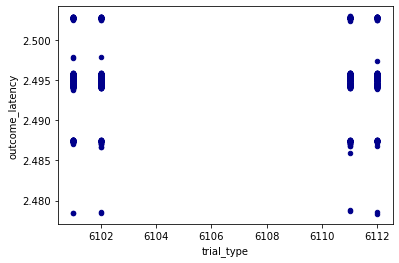

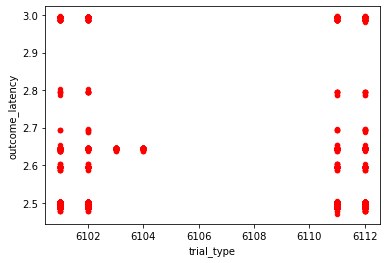

In [171]:
goodVNS_trials.plot.scatter(x = 'trial_type', y = 'outcome_latency', c = 'DarkBlue')
goodOFF_trials.plot.scatter(x = 'trial_type', y = 'outcome_latency', c = 'Red')

In [52]:
#good_trials.plot.scatter(x = 'trial_type', y = 'outcome_latency', c = 'VNS', colormap = 'plasma')

In [61]:
novel_VNS = goodVNS_trials[goodVNS_trials['trial_type'] == 6101]
novel_OFF = goodOFF_trials[goodOFF_trials['trial_type'] == 6101]

In [62]:
ranksums(novel_VNS['outcome_latency'], novel_OFF['outcome_latency'])

RanksumsResult(statistic=-6.756950264216219, pvalue=1.4092653880376331e-11)

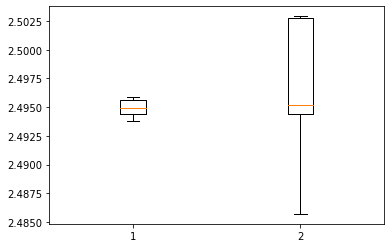

In [69]:
data = [novel_VNS['outcome_latency'], novel_OFF['outcome_latency']]
fig1, ax1 = plt.subplots()
ax1.boxplot(data, showfliers = False)
plt.show()

In [71]:
print(novel_VNS['outcome_latency'].mean())
print(novel_OFF['outcome_latency'].mean())

2.4949508583113906
2.5927778997980124


6101
2.4949508583113906
2.5927778997980124
KstestResult(statistic=0.24558303886925795, pvalue=1.2212453270876722e-15)
6111
2.4948695236946095
2.5919464167131387
KstestResult(statistic=0.24570751924215511, pvalue=0.0)
6102
2.4950091991093246
2.590484393965266
KstestResult(statistic=0.24551431660317652, pvalue=3.0618592085536008e-21)
6112
2.4949887465288048
2.5919821510246552
KstestResult(statistic=0.24394565859421147, pvalue=6.4084409115854094e-21)


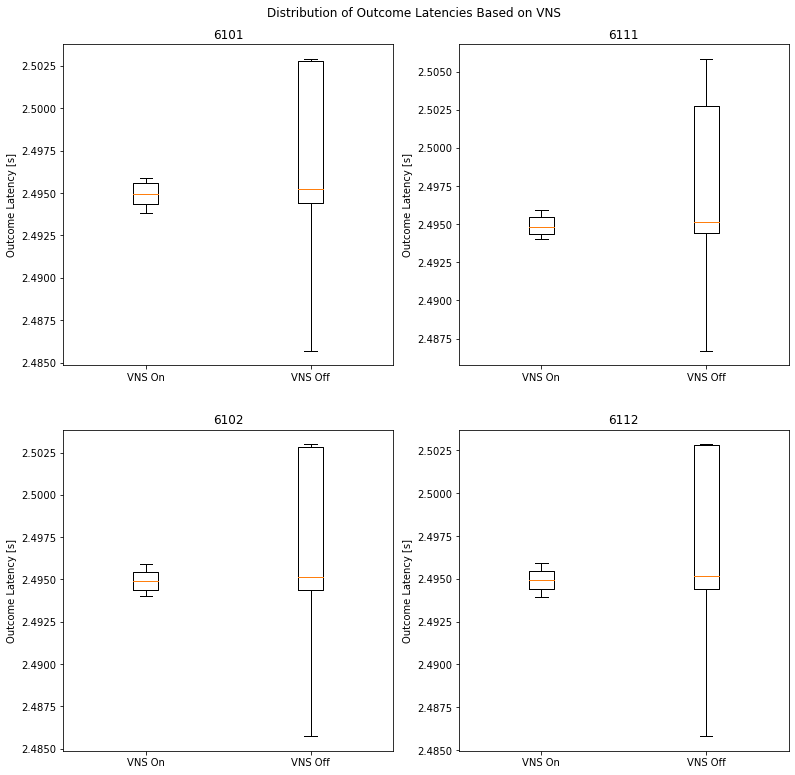

In [157]:
trial_types = [6101, 6111, 6102, 6112]
mean_latencies = pd.DataFrame(columns = ['Stim On', 'Stim Off'])
stddev = pd.DataFrame(columns = ['Stim On', 'Stim Off'])
fig, axs = plt.subplots(2, 2, figsize = (13,13))
axs = axs.ravel()
for trial in range(0,len(trial_types)):
    stim = goodVNS_trials[goodVNS_trials['trial_type'] == trial_types[trial]]
    off = goodOFF_trials[goodOFF_trials['trial_type'] == trial_types[trial]]
    print(trial_types[trial])
    #print(stats.normaltest(stim['outcome_latency']))
    #print(stats.normaltest(off['outcome_latency']))
    print(stim['outcome_latency'].mean())
    print(off['outcome_latency'].mean())
    print(ks_2samp(stim['outcome_latency'], off['outcome_latency']))
    mean_latencies = mean_latencies.append({'Stim On' : stim['outcome_latency'].mean(), 'Stim Off' : off['outcome_latency'].mean()}, ignore_index = True)
    stddev = stddev.append({'Stim On' : stim['outcome_latency'].std(), 'Stim Off' : off['outcome_latency'].std()}, ignore_index = True)
    data = [stim['outcome_latency'], off['outcome_latency']]
    axs[trial].boxplot(data, showfliers = False)
    axs[trial].set_title(str(trial_types[trial]))
    axs[trial].set_ylabel('Outcome Latency [s]')
    axs[trial].set_xticklabels(['VNS On','VNS Off'])

fig.suptitle('Distribution of Outcome Latencies Based on VNS', y = 0.92)
trial_box = plt.gcf()
plt.show()
trial_box.savefig('outcome_latency_boxplots.png', dpi = 100)

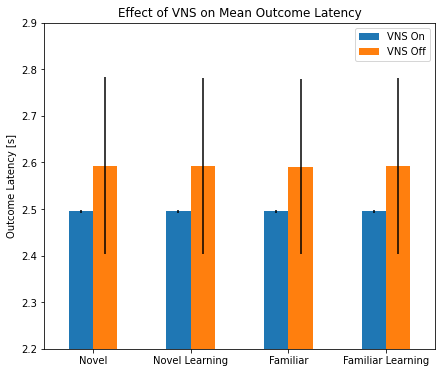

In [151]:
#plot mean outcome latencies for each trial type and condition
means = mean_latencies.plot.bar(ylim = (2.2,2.9), rot = 0, figsize = (7,6), yerr = stddev)
means.set_ylabel('Outcome Latency [s]')
labels = ['Novel','Novel Learning','Familiar','Familiar Learning']
means.set_xticklabels(labels)
means.legend(['VNS On','VNS Off'])
means.set_title('Effect of VNS on Mean Outcome Latency')
means.get_figure().savefig('outcome_latency_means.png', dpi = 100)